In [1]:
from utility import dse, parse_pickle, plot
import pickle
import matplotlib.pyplot as plt
import numpy as np

# with open('./result/pickle/random_full_space_test.pickle') as f:
#     histories_multi_fidelity = pickle.load(f)

with open('./result/pickle/random_test_cm0_rt10_mr50.pickle', 'rb') as f:
    histories_random = pickle.load(f)

with open('./result/pickle/multi_fidelity_test_cm0_rt10_mr100.pickle', 'rb') as f:
    histories_multi_fidelity = pickle.load(f)

with open('./result/pickle/single_fidelity_test_cm0_rt10_mr50.pickle', 'rb') as f:
    histories_single_fidelity = pickle.load(f)
# histories_single_fidelity = parse_pickle.parse_pickle('single_fidelity_inner20_rt20_mr50', strategy='single_fidelity')
# histories_random = parse_pickle.parse_pickle('random_inner20_rt20_mr50', strategy='random')

# curve_multi_fidelity = plot.get_curve(histories_multi_fidelity, strategy='multi_fidelity')
# curve_single_fidelity = plot.get_curve(histories_single_fidelity, strategy='single_fidelity')
# curve_random = plot.get_curve(histories_random, strategy='random')

curve_highest_mean_multi_fidelity = plot.get_highest_mean_curve(histories_multi_fidelity, strategy='multi_fidelity')
curve_highest_mean_single_fidelity = plot.get_highest_mean_curve(histories_single_fidelity, strategy='single_fidelity')
curve_highest_mean_random = plot.get_highest_mean_curve(histories_random, strategy='random')


(DEBUG) 2023-04-19 13:21:36,864 [logger.py:40] logger init.
(INFO) 2023-04-19 13:21:36,865 [logger.py:42] Logfile /home/yiqi/wafer_scale_chip_dse_framework/log/DSE4WSE_2023-04-19-13-21-36-864774.log


In [ ]:
curve_highest_mean_random

In [2]:
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('deep')
plt.figure(figsize=(10,6), tight_layout=True)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

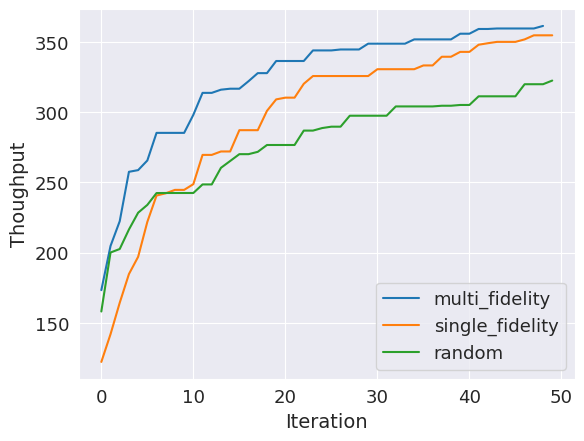

In [3]:
plt.plot(np.arange(len(curve_highest_mean_multi_fidelity[0])), -curve_highest_mean_multi_fidelity[0], label='multi_fidelity')
plt.plot(np.arange(len(curve_highest_mean_single_fidelity)), -curve_highest_mean_single_fidelity, label='single_fidelity')
plt.plot(np.arange(len(curve_highest_mean_random)), -curve_highest_mean_random, label='random')

plt.xlabel('Iteration')
plt.ylabel('Thoughput')

plt.legend()
plt.show()